# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')

In [6]:
flights.shape

(144, 3)

In [3]:
tips = sns.load_dataset('tips')

In [7]:
tips.shape

(244, 7)

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
# Matrix form for correlation data
tips.corr()

ValueError: could not convert string to float: 'No'

In [13]:
import pandas as pd

# Sample Data
data = {
    "Math_Score": [88, 92, 79, 93, 85],
    "Reading_Score": [90, 85, 80, 95, 87],
    "Writing_Score": [91, 89, 78, 97, 84],
    "Age": [15, 16, 15, 16, 15]
}

df = pd.DataFrame(data)

df


,Math_Score,Reading_Score,Writing_Score,Age
0,88,90,91,15
1,92,85,89,16
2,79,80,78,15
3,93,95,97,16
4,85,87,84,15


In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

print(corr_matrix)

               Math_Score  Reading_Score  Writing_Score       Age
Math_Score       1.000000       0.756383       0.920113  0.819178
Reading_Score    0.756383       1.000000       0.928481  0.424239
Writing_Score    0.920113       0.928481       1.000000  0.660188
Age              0.819178       0.424239       0.660188  1.000000


In [15]:
import pandas as pd

# Sample Data with Unordered Categorical Column
df = pd.DataFrame({
    "Salary": [50000, 60000, 75000, 80000, 120000],
    "Experience": [2, 4, 5, 7, 10],
    "Department": ["HR", "IT", "Finance", "HR", "IT"]
})

df

,Salary,Experience,Department
0,50000,2,HR
1,60000,4,IT
2,75000,5,Finance
3,80000,7,HR
4,120000,10,IT


In [17]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Department"], drop_first=True)

df_encoded


,Salary,Experience,Department_HR,Department_IT
0,50000,2,True,False
1,60000,4,False,True
2,75000,5,False,False
3,80000,7,True,False
4,120000,10,False,True


In [18]:
# Compute correlation
print(df_encoded.corr())

                 Salary  Experience  Department_HR  Department_IT
Salary         1.000000    0.974592      -0.408248       0.442269
Experience     0.974592    1.000000      -0.329276       0.419079
Department_HR -0.408248   -0.329276       1.000000      -0.666667
Department_IT  0.442269    0.419079      -0.666667       1.000000


In [20]:
from sklearn.preprocessing import LabelEncoder

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
for col in ["sex","smoker", "day", "time"]:
    le = LabelEncoder()
    tips[col] = le.fit_transform(tips[col])

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [24]:
tips.corr()

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


<Axes: >

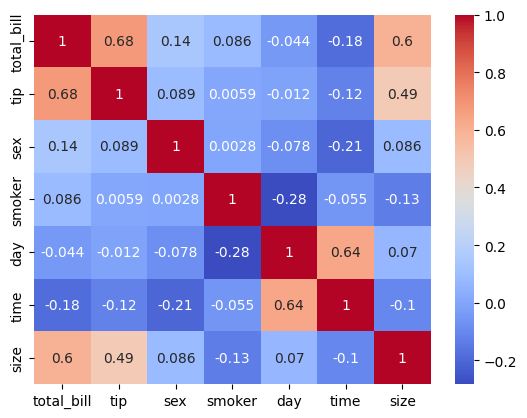

In [25]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [26]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [27]:
flights.pivot_table(values='passengers',index='month',columns='year')

/tmp/ipykernel_1580466/2056291100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


/tmp/ipykernel_1580466/375637786.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values='passengers',index='month',columns='year')


<Axes: xlabel='year', ylabel='month'>

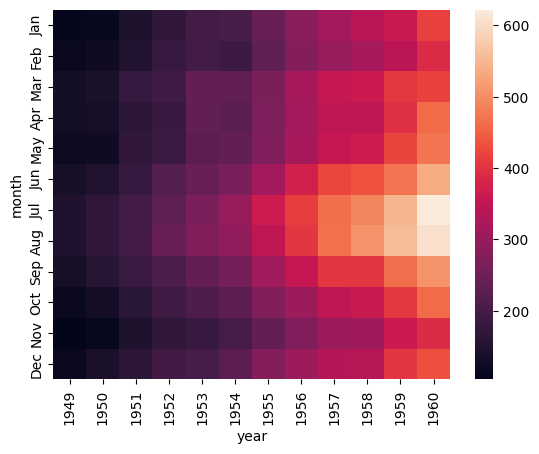

In [28]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

<Axes: xlabel='year', ylabel='month'>

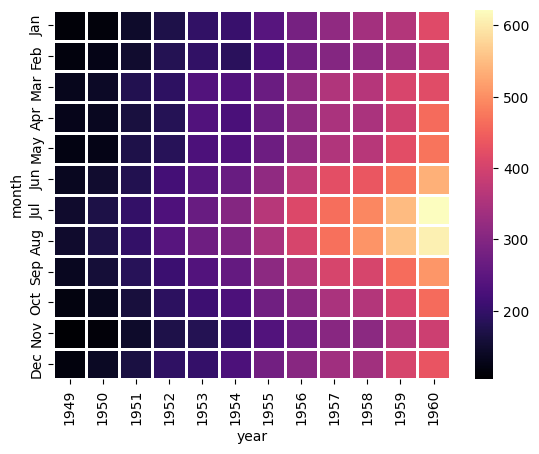

In [32]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)